### Word Embeddings Solution

###### Author: Alex Sherman | alsherman@deloitte.com


##### Agenda
- Word2Vec
- Doc2Vec
- Category2Vec

In [11]:
from collections import defaultdict, Counter
from configparser import ConfigParser, ExtendedInterpolation
from IPython.core.display import display, HTML
from IPython.display import Image
from IPython.lib.display import YouTubeVideo
import pandas as pd
import numpy as np
import spacy
from gensim.models import word2vec
import pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### installation: 
# conda install pyldavis
# conda install visdom

config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('../../config.ini')
GENSIM_DICTIONARY_PATH = config['NLP']['GENSIM_DICTIONARY_PATH']
GENSIM_CORPUS_PATH = config['NLP']['GENSIM_CORPUS_PATH']
CLEANED_TEXT_PATH = config['NLP']['CLEANED_TEXT_PATH']

### Word embedding
"Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with much higher dimension.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, and explicit representation in terms of the context in which words appear.

Word and phrase embeddings, when used as the underlying input representation, have been shown to boost the performance in NLP tasks such as syntactic parsing and sentiment analysis."

##### There are many techniques to create Word Embeddings. Some of the popular ones are:

- Binary Encoding
- TF Encoding
- TF-IDF Encoding
- Latent Semantic Analysis Encoding
- Topic Modeling
- Word2Vec Encoding

SOURCE: https://en.wikipedia.org/wiki/Word_embedding

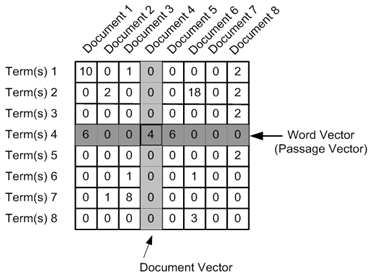

In [11]:
# Document and Word Vectors
Image("../../raw_data/images/word_vector.png", width=400)

In [28]:
with open(CLEANED_TEXT_PATH, 'r') as f:
    texts = list(set([row.strip() for row in f]))

# convert each line of text into a list of tokens for gensim
texts = [text.split() for text in texts]

print(texts[0])

['describe', 'here', 'be', 'unique', 'case_of_whipple', 'disease', 'in', 'year_old', 'man', 'with', 'chronic', 'severe', 'cough', 'and', 'symptom', 'in', 'whom', 'the', 'initial_diagnosis', 'of', 'whipple_disease', 'be', 'make', 'by', 'lung_biopsy']


# Word2Vec

##### There are many things you can do to capture similarity:
- Query expansion with synonym dictionaries
- Separately learning word similarities from large corpora
- Encode similarity

##### Why do we need Word Embeddings?
"Many machine learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms. And with the huge amount of data that is present in the text format, it is imperative to extract knowledge out of it and build applications."

"So a natural language modelling technique like Word Embedding is used to map words or phrases from a vocabulary to a corresponding vector of real numbers. As well as being amenable to processing by ML algorithms, this vector representation has two important and advantageous properties:

- **Dimensionality Reduction** - it is a more efficient representation
- **Contextual Similarity** - it is a more expressive representation"


##### Techniques (Count versus Predictive)
Count-based methods compute the statistics of how often some word co-occurs with its neighbor words in a large text corpus, and then map these count-statistics down to a small, dense vector for each word. Predictive models directly try to predict a word from its neighbors in terms of learned small, dense embedding vectors (considered parameters of the model)."


##### Improvement over other methods 

Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word.

It is defining a word by the company that it keeps that allows the word embedding to learn something about the meaning of words. The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to breakthrough performance with deep neural networks on problems like machine translation.


SOURCE: 
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [What is word embedding in deep learning?](https://www.quora.com/What-is-word-embedding-in-deep-learning)
- [Representations for Language: From Word Embeddings to Sentence Meanings
](https://nlp.stanford.edu/manning/talks/Simons-Institute-Manning-2017.pdf)
- [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

In [3]:
from gensim.models import word2vec

corpus = [
          'Text of the first document.',
          'Text of the second document made longer.',
          'Number three.',
          'This is number four.',
]

# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in corpus]
tokenized_sentences

C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\alsherman\AppData\Local\Continuum\anaconda3\envs\guild\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[['Text', 'of', 'the', 'first', 'document.'],
 ['Text', 'of', 'the', 'second', 'document', 'made', 'longer.'],
 ['Number', 'three.'],
 ['This', 'is', 'number', 'four.']]

### word2Vec Hyperparameters

- **size:** (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- **window:** (default 5) The maximum distance between a target word and words around the target word.
- **min_count:** (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **workers:** (default 3) The number of threads to use while training.
- **sg:** (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [12]:
model = word2vec.Word2Vec(
      sentences=tokenized_sentences
    , size=10
    , window=5
    , min_count=1
    , sg=0
)

print(model)

Word2Vec(vocab=15, size=10, alpha=0.025)


In [13]:
print(list(model.wv.vocab))

['first', 'document.', 'four.', 'longer.', 'Text', 'three.', 'number', 'of', 'second', 'the', 'made', 'document', 'This', 'is', 'Number']


In [14]:
# create a word vector from a trained work
print(model.wv['Text'])

[-0.03114966 -0.03431065 -0.00636007  0.03074917 -0.0427835  -0.00627753
 -0.02844469 -0.03172956 -0.04433837  0.00612644]


In [15]:
# a trained model can then be saved to file
model.wv.save_word2vec_format('model.bin')

In [18]:
# The saved model can then be loaded again
model = Word2Vec.load('model.bin')
print(model)

NameError: name 'Word2Vec' is not defined

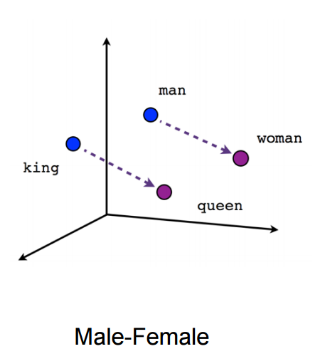

In [19]:
# Document and Word Vectors
Image("../../raw_data/images/man_to_king_w2v.png", width=300)

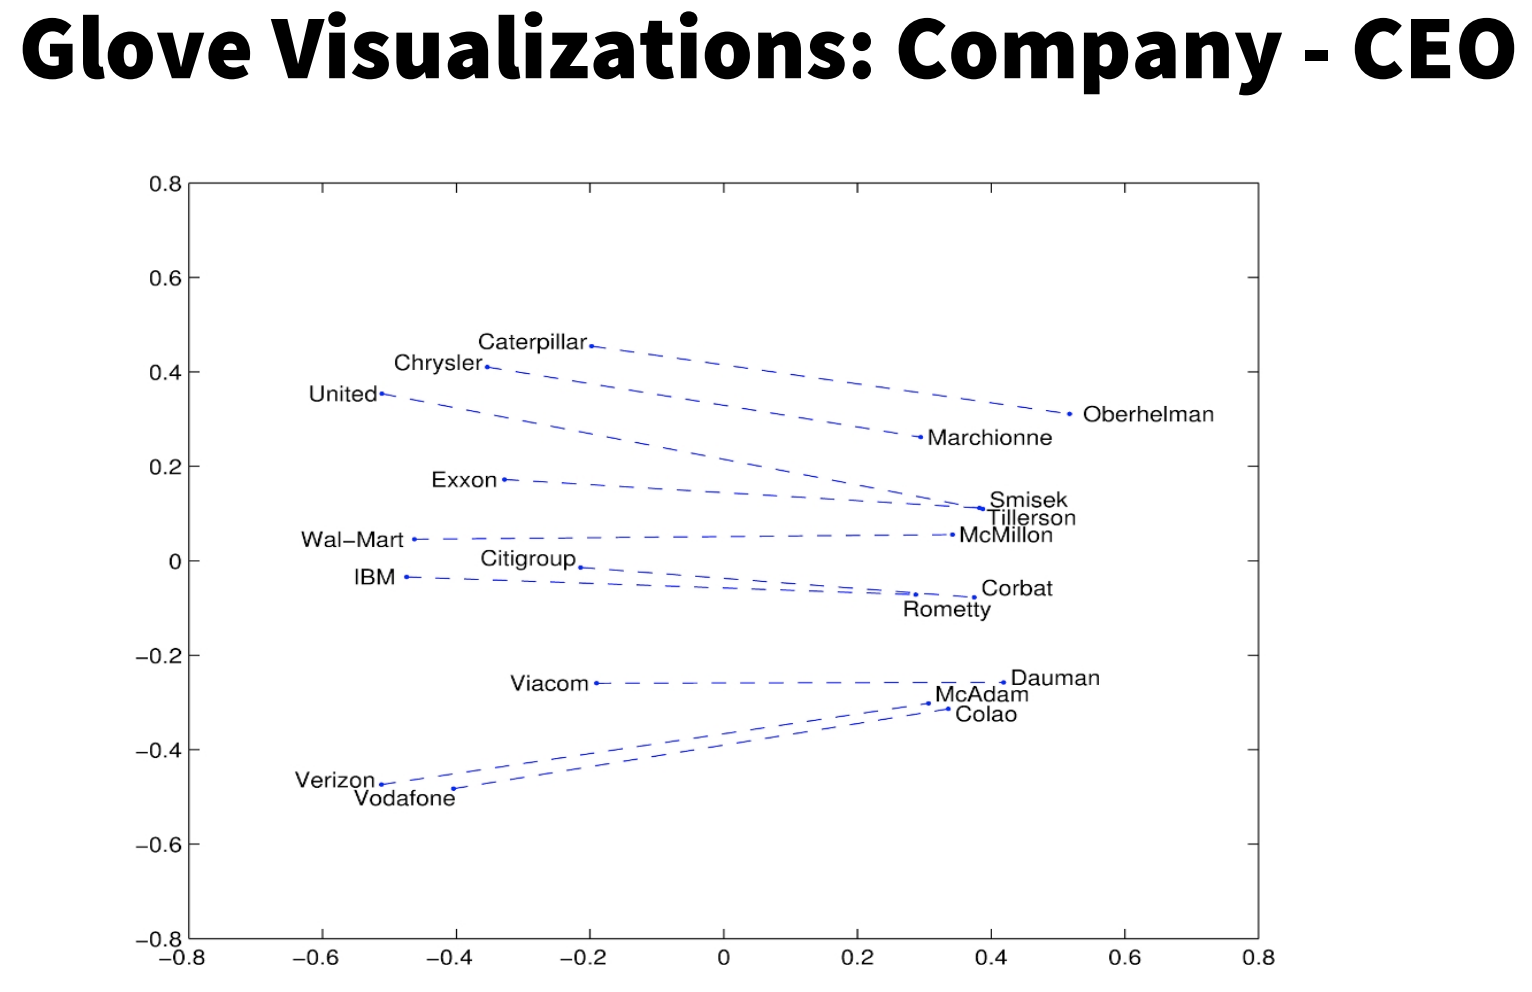

In [20]:
# GloVe Visual 
Image("../../raw_data/images/glove_visualizations.png", width=800)

### CBOW and skip-gram

Word2Vec uses a trick you may have seen elsewhere in machine learning. We’re going to train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.

The network is going to learn the statistics from the number of times each pairing shows up. So, for example, the network is probably going to get many more training samples of (“Soviet”, “Union”) than it is of (“Soviet”, “Sasquatch”). When the training is finished, if you give it the word “Soviet” as input, then it will output a much higher probability for “Union” or “Russia” than it will for “Sasquatch”.

"Word2vec is a particularly computationally-efficient predictive model for learning word embeddings from raw text. It comes in two flavors, the Continuous Bag-of-Words model (CBOW) and the Skip-Gram model (Section 3.1 and 3.2 in Mikolov et al.). Algorithmically, these models are similar, except that CBOW predicts target words (e.g. 'mat') from source context words ('the cat sits on the'), while the skip-gram does the inverse and predicts source context-words from the target words. This inversion might seem like an arbitrary choice, but statistically it has the effect that CBOW smoothes over a lot of the distributional information (by treating an entire context as one observation). For the most part, this turns out to be a useful thing for smaller datasets. However, skip-gram treats each context-target pair as a new observation, and this tends to do better when we have larger datasets. We will focus on the skip-gram model in the rest of this tutorial."

A standard approach for learning word representations is to train log-bilinear models based on either the skip-gram or the continuous bag-of-words (cbow) architectures, as implemented in word2vec (Mikolov et al., 2013a) and fastText (Bojanowski et al., 2017)1 . In the skip-gram model, nearby words are predicted given a source word, while in the cbow model, the source word is predicted according to its context. These architectures and their implementation have been optimized to produce high quality word representations able to transfer to many tasks, while maintaining a sufficiently

SOURCE: 
- [Advances in Pre-Training Distributed Word Representations](https://arxiv.org/pdf/1712.09405.pdf)
- [Vector Representations of Words](https://www.tensorflow.org/tutorials/word2vec)
- [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

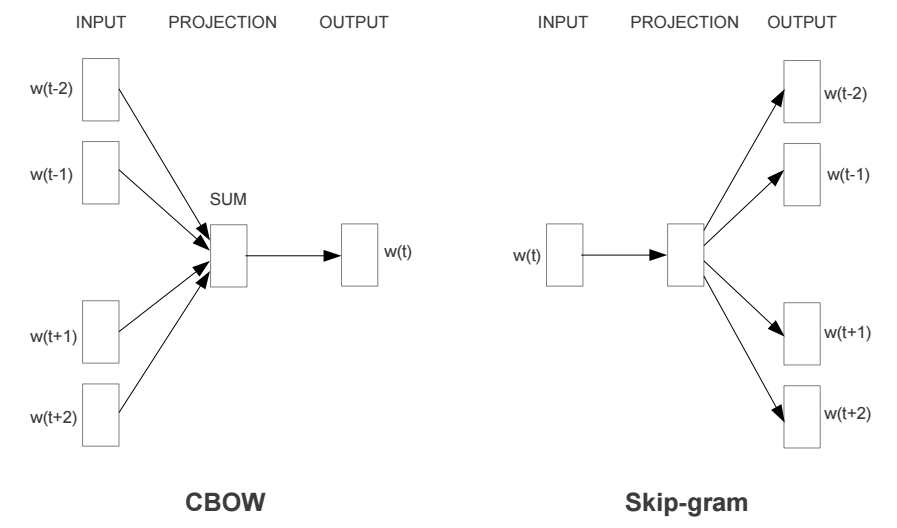

In [21]:
# Document and Word Vectors
Image("../../raw_data/images/word2vec_approaches.png", width=400, height=400)

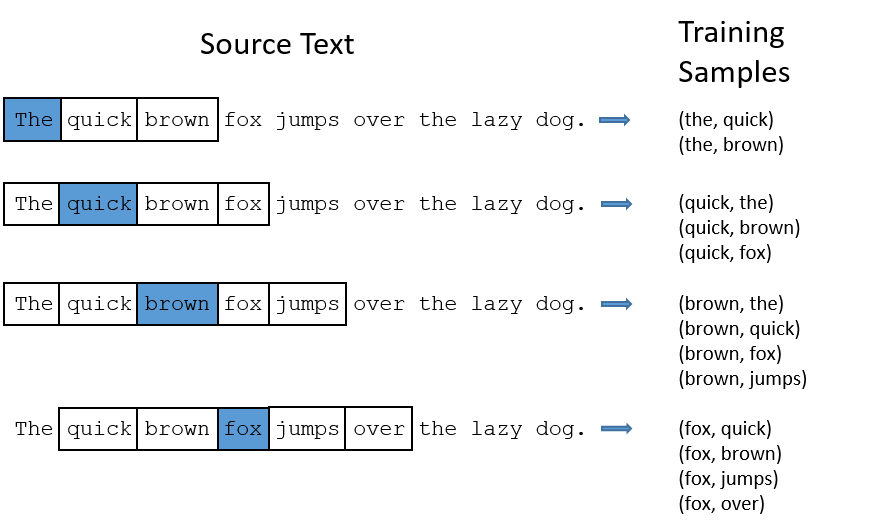

In [22]:
# Word2Vec Window
Image("../../raw_data/images/w2v_window.png", width=600)

##### Input
When training this network on word pairs, the input is a one-hot vector representing the input word and the training output is also a one-hot vector representing the output word. But when you evaluate the trained network on an input word, the output vector will actually be a probability distribution (i.e., a bunch of floating point values, not a one-hot vector).

##### The Hidden Layer
For our example, we’re going to say that we’re learning word vectors with 300 features. So the hidden layer is going to be represented by a weight matrix with 10,000 rows (one for every word in our vocabulary) and 300 columns (one for every hidden neuron).

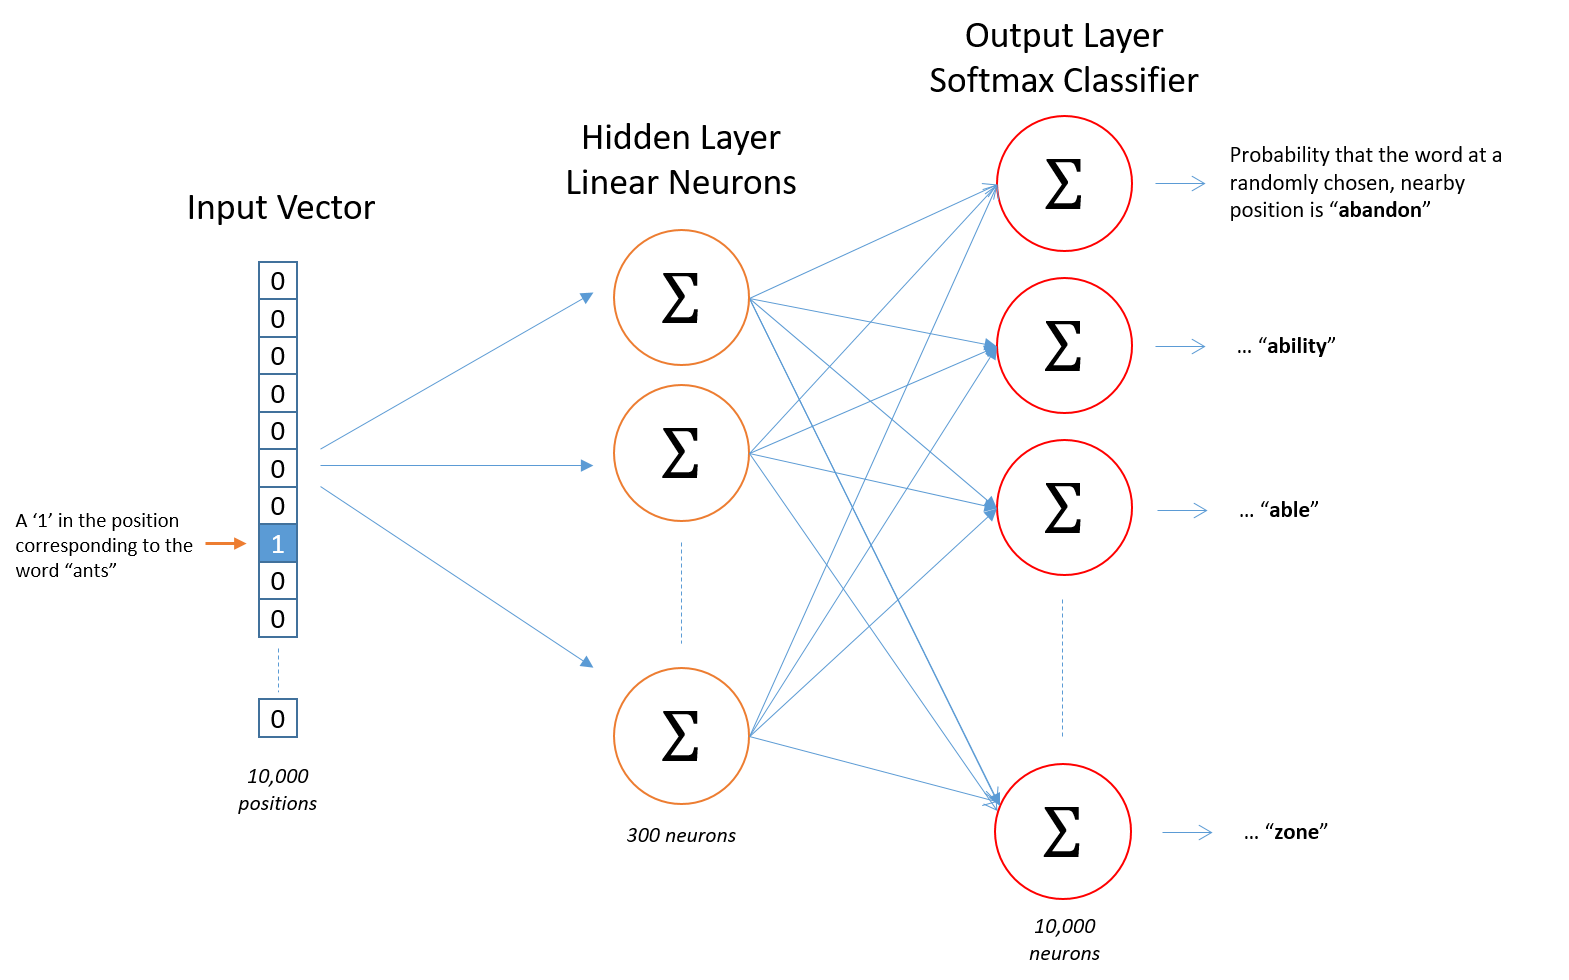

In [23]:
# Word2Vec Architecture
Image("../../raw_data/images/w2v_architecture.png", width=400)

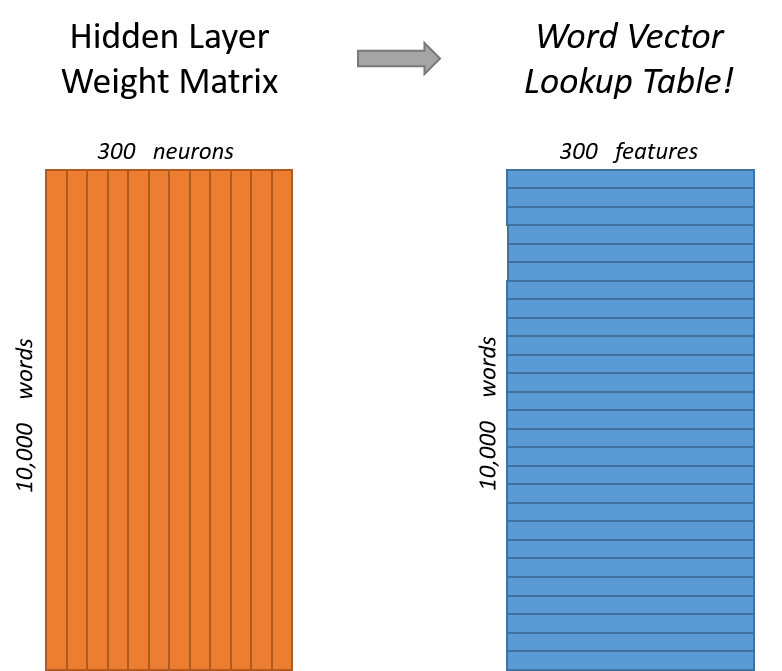

In [24]:
# Word2Vec Hidden Layer
Image("../../raw_data/images/word2vec_hidden_layer.png", width=400)

There are three innovations in this second paper:

- Treating common word pairs or phrases as single “words” in their model.
- Subsampling frequent words to decrease the number of training examples.
- Modifying the optimization objective with a technique they called “Negative Sampling”, which causes each training sample to update only a small percentage of the model’s weights.

##### Phrases
Each passonly looks at combinations of 2 words, but you can run it multiple times to get longer phrases. So, the first pass will pick up the phrase “New_York”, and then running it again will pick up “New_York_City” as a combination of “New_York” and “City”.

##### Subsampling
Word2Vec implements a “subsampling” scheme to address this. For each word we encounter in our training text, there is a chance that we will effectively delete it from the text. The probability that we cut the word is related to the word’s frequency.

If we have a window size of 10, and we remove a specific instance of “the” from our text:

As we train on the remaining words, “the” will not appear in any of their context windows.
We’ll have 10 fewer training samples where “the” is the input word.

##### Negative Sampling 
Training a neural network means taking a training example and adjusting all of the neuron weights slightly so that it predicts that training sample more accurately. In other words, each training sample will tweak all of the weights in the neural network.

As we discussed above, the size of our word vocabulary means that our skip-gram neural network has a tremendous number of weights, all of which would be updated slightly by every one of our billions of training samples!

Negative sampling addresses this by having each training sample only modify a small percentage of the weights, rather than all of them. Here’s how it works.

When training the network on the word pair (“fox”, “quick”), recall that the “label” or “correct output” of the network is a one-hot vector. That is, for the output neuron corresponding to “quick” to output a 1, and for all of the other thousands of output neurons to output a 0.

With negative sampling, we are instead going to randomly select just a small number of “negative” words (let’s say 5) to update the weights for. (In this context, a “negative” word is one for which we want the network to output a 0 for). We will also still update the weights for our “positive” word (which is the word “quick” in our current example).

SOURCE: 
- [Distributed Representations of Words and Phrases and their Compositionality:](https://arxiv.org/pdf/1310.4546.pdf)

##### Custom Embeddings

Biomedical word embeddings: English word embeddings pre-trained on biomedical texts from MEDLINE®/PubMed® using the Word2Vec implementation of the gensim toolkit

- [Biomedical word embeddings](http://nlp.cs.aueb.gr/software.html)

### Doc2Vec

Doc2vec (aka paragraph2vec, aka sentence embeddings) modifies the word2vec algorithm to unsupervised learning of continuous representations for larger blocks of text, such as sentences, paragraphs or entire documents.

SOURCE: 
- [Doc2vec tutorial](https://rare-technologies.com/doc2vec-tutorial/)
- [Distributed Representations of Sentences and Documents:](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)

Distributed Memory version of Paragraph Vector (PV-DM). It acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document.

SOURCE:
- [A gentle introduction to Doc2Vec](https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)

Paragraph Vector - Distributed Memory (PV-DM)
This is the Paragraph Vector model analogous to Continuous-bag-of-words Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of inferring a center word based on context words and a context paragraph. A paragraph is a context for all words in the paragraph, and a word in a paragraph can have that paragraph as a context.

Paragraph Vector - Distributed Bag of Words (PV-DBOW)
This is the Paragraph Vector model analogous to Skip-gram Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

SOURCE: 
- [Gensim Doc2vec Tutorial on the IMDB Sentiment Dataset](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb)

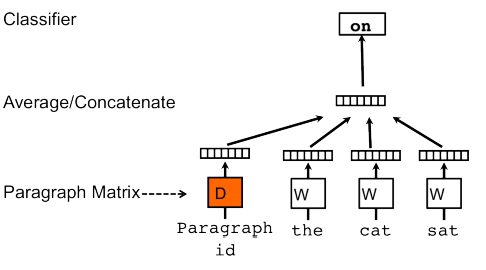

In [131]:
# Paragraph Vector - Distributed Memory (PV_DM) Model 
Image("../../raw_data/images/pv_dm.png", width=400)

In [29]:
sents = [' '.join(token) for token in texts if len(token) > 20]
len(sents)

17865

In [30]:
import gensim

def read_corpus(text, tokens_only=False):
    for i, line in enumerate(text):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])
                
                
                
train_corpus = list(read_corpus(sents, tokens_only=False))
train_corpus

[TaggedDocument(words=['describe', 'here', 'be', 'unique', 'case_of_whipple', 'disease', 'in', 'year_old', 'man', 'with', 'chronic', 'severe', 'cough', 'and', 'symptom', 'in', 'whom', 'the', 'of', 'whipple_disease', 'be', 'make', 'by', 'lung_biopsy'], tags=[0]),
 TaggedDocument(words=['organize', 'by', 'the', 'pan', 'american', 'health', 'organization', 'in', 'collaboration', 'with', 'the', 'government', 'of', 'brazil', 'and', 'other', 'paho', 'member', 'state', 'the', 'meet', 'have', 'three', 'principal', 'aim', 'to', 'review', 'the', 'general', 'subject', 'of', 'cerebrospinal', 'meningitis', 'and', 'the', 'special', 'situation', 'in', 'brazil', 'to', 'analyze', 'experience', 'gain', 'in', 'brazil', 'regard', 'treatment', 'and', 'reduction', 'of', 'mortality', 'among', 'and', 'to', 'develop', 'prevention', 'and', 'control', 'strategy', 'base', 'on', 'review', 'of', 'available', 'scientific', 'knowledge', 'and', 'technique', 'for', 'prevention', 'and', 'control', 'of'], tags=[1]),
 Tag

In [31]:
from gensim.models import doc2vec

model = doc2vec.Doc2Vec(
      documents=train_corpus
    , vector_size=50
    , min_count=4
    , epochs=55
)

model

TypeError: __init__() got an unexpected keyword argument 'epochs'

In [32]:
%%time
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

AttributeError: 'Word2Vec' object has no attribute 'epochs'

In [33]:
model.epochs

AttributeError: 'Word2Vec' object has no attribute 'epochs'

In [ ]:
model = doc2vec.Doc2Vec(alpha=0.025, min_alpha=0.025)  # use fixed learning rate
model.build_vocab(train_corpus)

for epoch in range(10):
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

In [ ]:
print(model.wv)

In [ ]:
model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])

In [ ]:
for ind, doc in enumerate(train_corpus):
    if ind > 5:
        break
    print('Original Sentence {}\n'.format(' '.join(doc.words)))
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=2)
    rank = [docid for docid, sim in sims]#.index(doc_id)
    
    for i in rank:
        print('Match: {}\n'.format(' '.join(train_corpus[i].words)))

### Category2Vec

SOURCE: 
- [Recommender System with Distributed Representation](https://www.slideshare.net/rakutentech/recommender-system-with-distributed-representation)
- [CAT2VEC: LEARNING DISTRIBUTED REPRESENTATION OF MULTI-FIELD CATEGORICAL DATA:](https://openreview.net/pdf?id=HyNxRZ9xg)


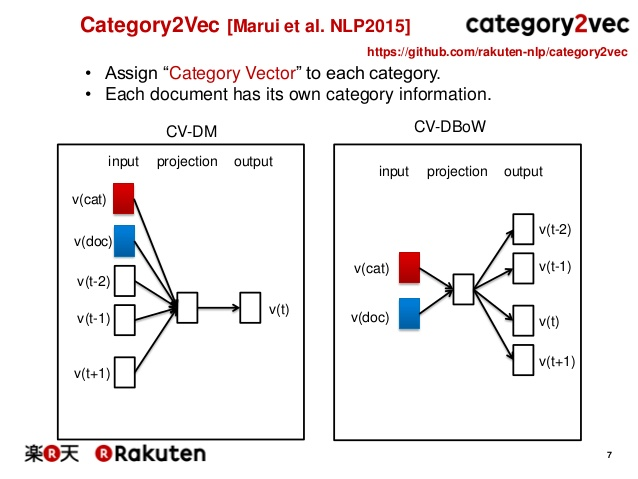

In [138]:
# Paragraph Vector - Distributed Memory (PV_DM) Model 
Image("../../raw_data/images/category2vec_architecture.jpg", width=400)

Resources to create content:
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)
- [The amazing power of word vectors](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)
- [Don’tcount,predict! Asystematiccomparisonof context-countingvs.context-predictingsemanticvectors
](http://clic.cimec.unitn.it/marco/publications/acl2014/baroni-etal-countpredict-acl2014.pdf)
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [Taming Text with the SVD](ftp://ftp.sas.com/techsup/download/EMiner/TamingTextwiththeSVD.pdf)